In [1]:
from createspectragrids import *
import numpy as np, os, sys
import matplotlib.pyplot as plt
from scipy import interpolate
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# The below saves the absolute path to the folder containing __this__ file
modulefolderpath = ''

/Users/lpin0002/anaconda3/envs/testywesty/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
channel_registry = {
    "eL": "eL",
    "eR": "eR",
    "e": "e",
    "muL": r"\[Mu]L",
    "muR": r"\[Mu]R",
    "mu": r"\[Mu]",
    "tauL": r"\[Tau]L",
    "tauR": r"\[Tau]R",
    "tau": r"\[Tau]",
    "q": "q",
    "c": "c",
    "b": "b",
    "t": "t",
    "WL": "WL",
    "WT": "WT",
    "W": "W",
    "ZL": "ZL",
    "ZT": "ZT",
    "Z": "Z",
    "g": "g",
    "gamma": r"\[Gamma]",
    "h": "h",
    "nu_e": r"\[Nu]e",
    "nu_mu": r"\[Nu]\[Mu]",
    "nu_tau": r"\[Nu]\[Tau]",
    "V->e": "V->e",
    "V->mu": r"V->\[Mu]",
    "V->tau": r"V->\[Tau]",
}

channelnames = list(channel_registry.keys())

In [3]:
channelnames = list(channel_registry.keys())

In [4]:
channeldictionary = {}
channelfuncdictionary = {}
massvalues          = np.load(modulefolderpath+f"griddata/massvals_massenergy_diffflux_grid.npy")/1e3
log10xvals        = np.load(modulefolderpath+f"griddata/log10xvals_massenergy_diffflux_grid.npy")

for channelname in channelnames:
    tempspectragrid = np.load(modulefolderpath+f"griddata/channel={channelname}_massenergy_diffflux_grid.npy")
    channeldictionary[channelname] = tempspectragrid
    channelfuncdictionary[channelname] = interpolate.interp2d(np.log10(massvalues), log10xvals, np.array(tempspectragrid).T, 
                                kind='linear', bounds_error=False, fill_value=1e-3000)

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_15590/716774667.py:9: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  channelfuncdictionary[channelname] = interpolate.interp2d(np.log10(massvalues), log10xvals, np.array(tempspectragrid).T,


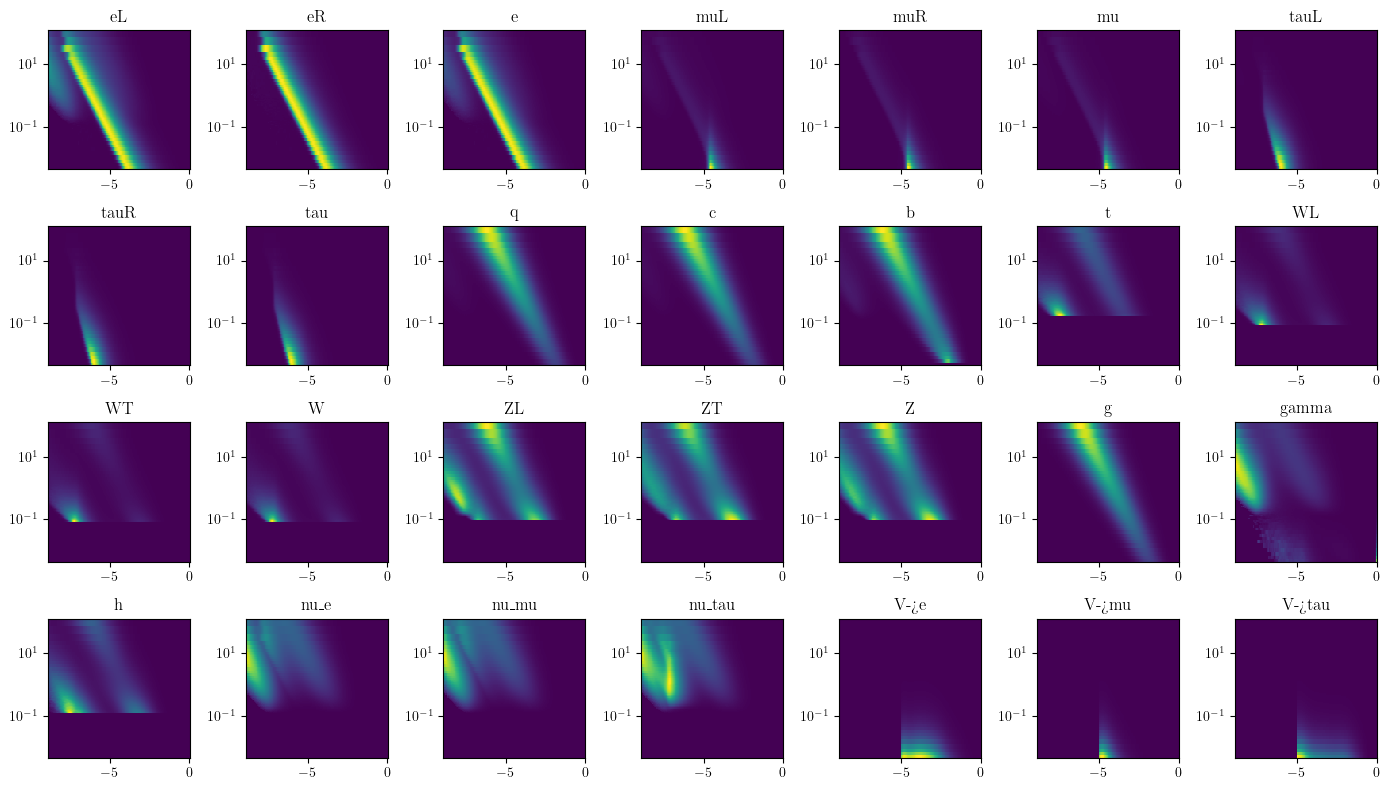

In [5]:

fig, ax = plt.subplots(4,7, figsize=(14,8))

for idx, channelarray in enumerate(channeldictionary.values()):
    ax[idx//7, idx%7].pcolormesh(log10xvals, massvalues, channelarray)
    ax[idx//7, idx%7].set_yscale('log')
    ax[idx//7, idx%7].set_title(channelnames[idx])

plt.tight_layout()
plt.show()


In [10]:
bfmlambdaarray = np.load("220913_145357/bfmlambdaarray.npy")
lambdarange = np.load("220913_145357/lambdarange.npy")
massrange = np.load("220913_145357/massrange.npy")


dataArr=bfmlambdaarray
  
Lambda = dataArr[0,:,1]
log_m_DM = np.log10(dataArr[:,0,0])-3
relic = dataArr[:,:,2]
Bfw = dataArr[:,:,3]
Bfz = dataArr[:,:,4]
Bfh = dataArr[:,:,5]
Bfb = dataArr[:,:,6]
Bfc = dataArr[:,:,7]
Bfl = dataArr[:,:,8]
Bfg = dataArr[:,:,9]
Bft = dataArr[:,:,10]

# relicdensityinterped = interpolate.interp2d(Lambda,m_DM, relic)
Bfw_interp = interpolate.interp2d(Lambda,log_m_DM, Bfw)
Bfz_interp = interpolate.interp2d(Lambda,log_m_DM, Bfz)
Bfh_interp = interpolate.interp2d(Lambda, log_m_DM, Bfh)
Bfb_interp = interpolate.interp2d(Lambda, log_m_DM, Bfb)
Bfc_interp = interpolate.interp2d(Lambda, log_m_DM, Bfc)
Bfl_interp = interpolate.interp2d(Lambda, log_m_DM, Bfl)
Bfg_interp = interpolate.interp2d(Lambda, log_m_DM, Bfg)
Bft_interp = interpolate.interp2d(Lambda, log_m_DM, Bft)

bfmainchannelnames = ['W','Z','h','b','c','tau','g','t']
branchingfractionfuncs = [Bfw_interp, Bfz_interp, Bfh_interp, Bfb_interp, Bfc_interp, Bfl_interp, Bfg_interp, Bft_interp]
branchingfunctiondictionary = dict(zip(bfmainchannelnames, branchingfractionfuncs))

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_15590/2537995518.py:21: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  Bfw_interp = interpolate.interp2d(Lambda,log_m_DM, Bfw)
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_15590/2537995518.py:22: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
sca

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_15590/1366239588.py:5: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see
        `https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  plt.plot(10**true_temp_log_energyvals, func(0.1, true_temp_log_energyvals).squeeze(), label = bfmainchannelnames[idx])


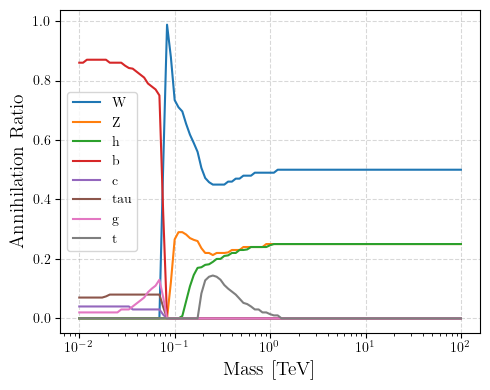

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_15590/1366239588.py:17: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see
        `https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  plt.pcolormesh(10**true_temp_log_energyvals, Lambda, Bfw_interp(Lambda, true_temp_log_energyvals), label = 'W', shading='gouraud')


TypeError: Dimensions of C (101, 512) are incompatible with X (101) and/or Y (512); see help(pcolormesh)

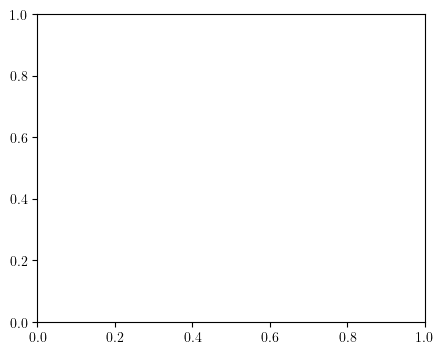

In [11]:
true_temp_log_energyvals = np.linspace(-2,2,101)

plt.figure(dpi=100, figsize=(5,4))
for idx, func in enumerate(branchingfractionfuncs):
    plt.plot(10**true_temp_log_energyvals, func(0.1, true_temp_log_energyvals).squeeze(), label = bfmainchannelnames[idx])
plt.grid(axis='both', c='grey', alpha=0.3, ls='--')
plt.xscale('log')
plt.xlabel('Mass [TeV]',size=14)
plt.ylabel('Annihilation Ratio',size=14)
plt.legend()
plt.tight_layout()
plt.savefig('DM_BFs.pdf')
plt.show()


plt.figure(dpi=100, figsize=(5,4))
plt.pcolormesh(10**true_temp_log_energyvals, Lambda, Bfw_interp(Lambda, true_temp_log_energyvals), label = 'W', shading='gouraud')
plt.grid(axis='both', c='grey', alpha=0.3, ls='--')
plt.loglog()
plt.xlabel('Mass [TeV]')
plt.ylabel(r'$\lambda_{hS}$')
plt.colorbar(label='Annihilation Ratio')
plt.tight_layout()
# plt.savefig('DM_BFs.pdf')
plt.show()


plt.figure(dpi=100, figsize=(5,4))
plt.pcolormesh(10**true_temp_log_energyvals, Lambda, branchingfunctiondictionary['W'](Lambda, true_temp_log_energyvals).squeeze(), label = 'W')
plt.grid(axis='both', c='grey', alpha=0.3, ls='--')
plt.loglog()
plt.xlabel('Mass [TeV]')
plt.ylabel(r'$\lambda_{hS}$')
plt.colorbar(label='Annihilation Ratio')
plt.tight_layout()
# plt.savefig('DM_BFs.pdf')
plt.show()

In [ ]:
def energymassinputspectralfunc(logmass, logenergy):
    finalresult = 0
    
    for channel in bfmainchannelnames:
        branchingfraction = branchingfunctiondictionary[channel](0.1,logmass)
        singlechannelspectra = channelfuncdictionary[channel](logmass, logenergy-logmass)
        finalresult+=branchingfraction*singlechannelspectra
    
    return finalresult

    

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_52400/2862660673.py:5: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see
        `https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  branchingfraction = branchingfunctiondictionary[channel](0.1,logmass)
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_52400/2862660673.py:6: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nea

$W^+W^-$
$hh$
$ZZ$


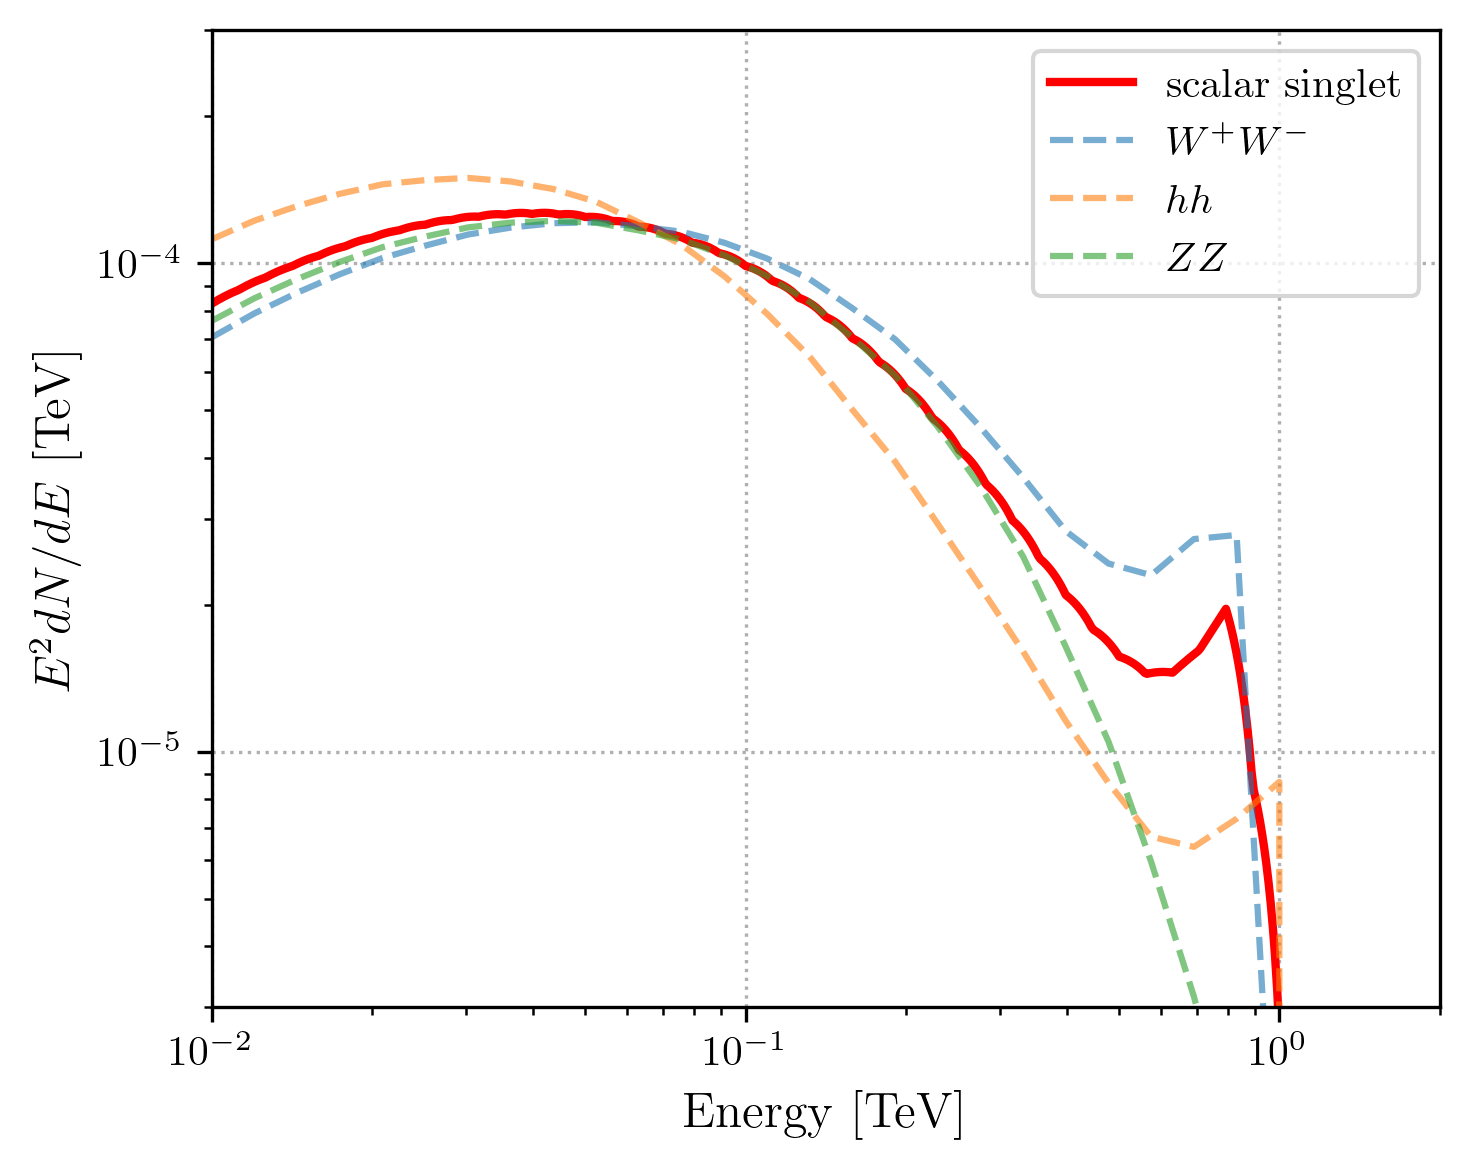

In [ ]:
plt.figure(dpi=300, figsize=(5,4))
plt.plot(10**np.linspace(-2,2,1001), (10**np.linspace(-2,2,1001))**2*np.squeeze(energymassinputspectralfunc(0.0, np.linspace(-2,2,1001))), 
         lw=2, c='red', label='scalar singlet')
plt.loglog()


nice_name_channels = [r'$W^+W^-$', r'$hh$', r'$ZZ$']
for idx, channel in enumerate(['W', 'h', 'Z']):  
    vals = channelfuncdictionary[f'{channel}'](0.0, np.linspace(-2,2,51))
    print(nice_name_channels[idx])
    plt.plot(10**np.linspace(-2,2,51), (10**np.linspace(-2,2,51))**2*np.squeeze(vals), ls='--', label=nice_name_channels[idx], alpha=0.6)
plt.ylim([3e-6, 3e-4])
plt.xlim([1e-2, 2e0])
plt.grid(ls=":")
plt.xlabel("Energy [TeV]", size=12)
plt.ylabel(r"$E^2 dN/dE$ [TeV]", size=12)
plt.legend()
plt.tight_layout()
plt.savefig('example_DM_spectra.pdf')
plt.show()

In [ ]:
testdict = {'name':10}

In [ ]:
testdict['name']

10

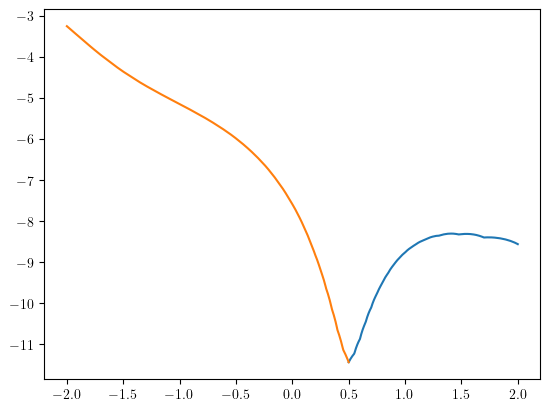

In [ ]:
fakemassaxis = np.linspace(-2,2,1001)
singleval = 0.5
singleenergyspectravals = [darkmatterdoubleinput(fakemass, singleval) for fakemass in fakemassaxis]
plt.figure()
plt.plot(fakemassaxis, singleenergyspectravals)
plt.plot(fakemassaxis, darkmatterdoubleinput(singleval, fakemassaxis))
plt.show()

In [ ]:
%%timeit
darkmatterdoubleinput(0.0, np.logspace(-2,2,201))

57.4 µs ± 230 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%%timeit
energymassinputspectralfunc(0.0, np.logspace(-2,2,201))

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_51768/2862660673.py:5: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see
        `https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  branchingfraction = branchingfunctiondictionary[channel](0.1,logmass)
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_51768/2862660673.py:6: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nea

399 µs ± 938 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
402e-6*1e5

40.2

[1.00000000e-02 1.01859139e-02 1.03752842e-02 1.05681751e-02
 1.07646521e-02 1.09647820e-02 1.11686325e-02 1.13762729e-02
 1.15877736e-02 1.18032064e-02 1.20226443e-02 1.22461620e-02
 1.24738351e-02 1.27057411e-02 1.29419584e-02 1.31825674e-02
 1.34276496e-02 1.36772883e-02 1.39315680e-02 1.41905752e-02
 1.44543977e-02 1.47231250e-02 1.49968484e-02 1.52756606e-02
 1.55596563e-02 1.58489319e-02 1.61435856e-02 1.64437172e-02
 1.67494288e-02 1.70608239e-02 1.73780083e-02 1.77010896e-02
 1.80301774e-02 1.83653834e-02 1.87068214e-02 1.90546072e-02
 1.94088588e-02 1.97696964e-02 2.01372425e-02 2.05116218e-02
 2.08929613e-02 2.12813905e-02 2.16770410e-02 2.20800473e-02
 2.24905461e-02 2.29086765e-02 2.33345806e-02 2.37684029e-02
 2.42102905e-02 2.46603934e-02 2.51188643e-02 2.55858589e-02
 2.60615355e-02 2.65460556e-02 2.70395836e-02 2.75422870e-02
 2.80543364e-02 2.85759054e-02 2.91071712e-02 2.96483139e-02
 3.01995172e-02 3.07609681e-02 3.13328572e-02 3.19153786e-02
 3.25087297e-02 3.311311

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

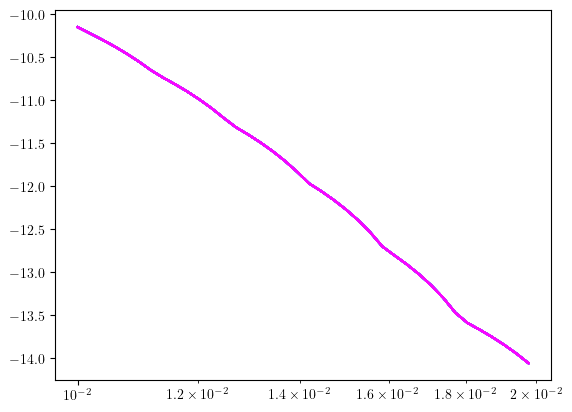

In [ ]:
from matplotlib.pyplot import get_cmap

cmap = get_cmap('cool')
testenergies = np.logspace(-2,2,501)
print(testenergies)
higgs_coupling_vals = np.logspace(-2,2,50)
massvals = [2e-2]
totalnum = len(higgs_coupling_vals)*len(massvals)
plt.figure()
counter=0
for idx, higgs_coupling in enumerate(higgs_coupling_vals):
    for mass in massvals:
        plt.plot(testenergies, fullsinputspectralfunc(mass, higgs_coupling, testenergies), 
                 label=f"mass={mass} and "+r"$\lambda_{hS}$"+f"={higgs_coupling}",
                 color=cmap(counter))
        print(fullsinputspectralfunc(mass, higgs_coupling, testenergies).shape)
    counter+=1/len(higgs_coupling_vals)
plt.xscale('log')
plt.xlabel()
# plt.legend()
plt.show()

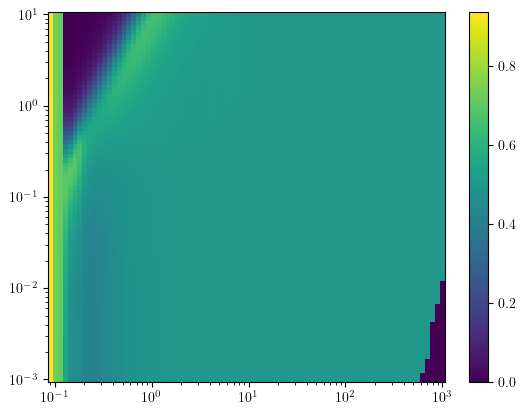

[9.00000000e-02 1.01114742e-01 1.13602123e-01 1.27631659e-01
 1.43393803e-01 1.61102527e-01 1.80998227e-01 2.03350989e-01
 2.28464254e-01 2.56678934e-01 2.88378047e-01 3.23991909e-01
 3.64003981e-01 4.08957429e-01 4.59462499e-01 5.16204800e-01
 5.79954613e-01 6.51577346e-01 7.32045280e-01 8.22450774e-01
 9.24021086e-01 1.03813504e+00 1.16634174e+00 1.31038161e+00
 1.47220998e+00 1.65402369e+00 1.85829087e+00 2.08778447e+00
 2.34561987e+00 2.63529720e+00 2.96074884e+00 3.32639284e+00
 3.73719282e+00 4.19872542e+00 4.71725597e+00 5.29982356e+00
 5.95433658e+00 6.68968008e+00 7.51583639e+00 8.44402064e+00
 9.48683298e+00 1.06584297e+01 1.19747152e+01 1.34535582e+01
 1.51150340e+01 1.69816974e+01 1.90788883e+01 2.14350764e+01
 2.40822469e+01 2.70563353e+01 3.03977152e+01 3.41517458e+01
 3.83693885e+01 4.31078980e+01 4.84315999e+01 5.44127636e+01
 6.11325839e+01 6.86822828e+01 7.71643478e+01 8.66939236e+01
 9.74003746e+01 1.09429042e+02 1.22943215e+02 1.38126349e+02
 1.55184557e+02 1.743494

In [ ]:

plt.figure()
plt.pcolormesh(massrange, lambdarange, bfmlambdaarray[:,:,3].T)
plt.colorbar()
plt.loglog()
plt.show()
print(massrange)



/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_51768/3303593354.py:2: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see
        `https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  plt.pcolormesh(massrange, lambdarange, branchingfunctiondictionary['W'](lambdarange,np.log10(massrange)).T)


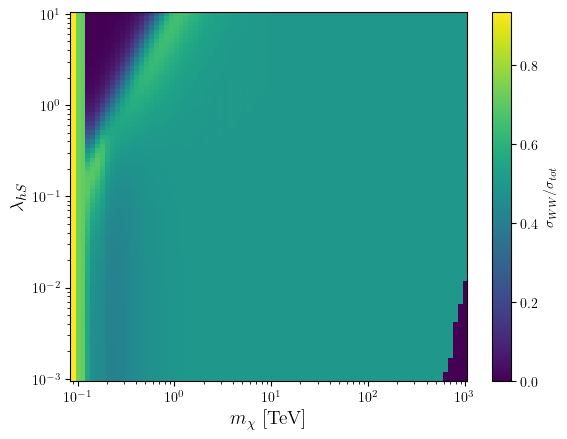

In [ ]:
plt.figure()
plt.pcolormesh(massrange, lambdarange, branchingfunctiondictionary['W'](lambdarange,np.log10(massrange)).T)
plt.colorbar(label=r'$\sigma_{WW}/\sigma_{tot}$')
plt.xlabel(r'$m_\chi$ [TeV]', size=14)
plt.ylabel(r'$\lambda_{hS}$', size=14)
plt.loglog()
plt.show()

In [ ]:
massrange = np.load('temp/massrange.npy')
print(massrange)

[9.00000000e-02 1.01114742e-01 1.13602123e-01 1.27631659e-01
 1.43393803e-01 1.61102527e-01 1.80998227e-01 2.03350989e-01
 2.28464254e-01 2.56678934e-01 2.88378047e-01 3.23991909e-01
 3.64003981e-01 4.08957429e-01 4.59462499e-01 5.16204800e-01
 5.79954613e-01 6.51577346e-01 7.32045280e-01 8.22450774e-01
 9.24021086e-01 1.03813504e+00 1.16634174e+00 1.31038161e+00
 1.47220998e+00 1.65402369e+00 1.85829087e+00 2.08778447e+00
 2.34561987e+00 2.63529720e+00 2.96074884e+00 3.32639284e+00
 3.73719282e+00 4.19872542e+00 4.71725597e+00 5.29982356e+00
 5.95433658e+00 6.68968008e+00 7.51583639e+00 8.44402064e+00
 9.48683298e+00 1.06584297e+01 1.19747152e+01 1.34535582e+01
 1.51150340e+01 1.69816974e+01 1.90788883e+01 2.14350764e+01
 2.40822469e+01 2.70563353e+01 3.03977152e+01 3.41517458e+01
 3.83693885e+01 4.31078980e+01 4.84315999e+01 5.44127636e+01
 6.11325839e+01 6.86822828e+01 7.71643478e+01 8.66939236e+01
 9.74003746e+01 1.09429042e+02 1.22943215e+02 1.38126349e+02
 1.55184557e+02 1.743494

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_51768/3270692354.py:2: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see
        `https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  plt.plot(testenergies, channelfuncdictionary['W'](np.log10(2e-1), np.log10(testenergies)-np.log10(2e-1)), label='W')
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_51768/3270692354.py:3: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed

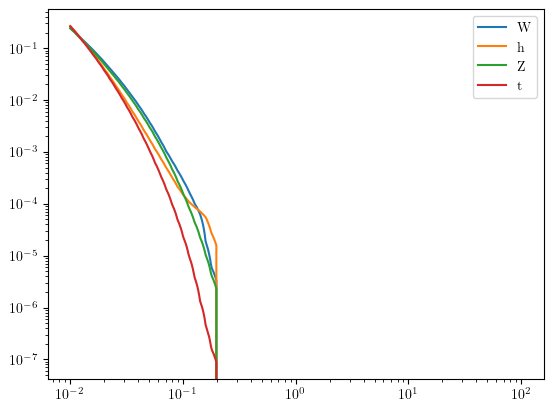

In [ ]:

plt.figure()
plt.plot(testenergies, channelfuncdictionary['W'](np.log10(2e-1), np.log10(testenergies)-np.log10(2e-1)), label='W')
plt.plot(testenergies, channelfuncdictionary['h'](np.log10(2e-1), np.log10(testenergies)-np.log10(2e-1)), label='h')
plt.plot(testenergies, channelfuncdictionary['Z'](np.log10(2e-1), np.log10(testenergies)-np.log10(2e-1)), label='Z')
plt.plot(testenergies, channelfuncdictionary['t'](np.log10(2e-1), np.log10(testenergies)-np.log10(2e-1)), label='t')
plt.loglog()
plt.legend()
plt.show()